<a href="https://colab.research.google.com/github/sam002696/pytorch_colab/blob/main/pytorch_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Model**



In [22]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Create the data parameters
weight = 0.3
bias = 0.9

start=0
end=1
step=0.02

# Make X and y using linear regression feature
X=torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 50
Number of y samples: 50
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240],
        [0.9300],
        [0.9360],
        [0.9420],
        [0.9480],
        [0.9540]])


In [5]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

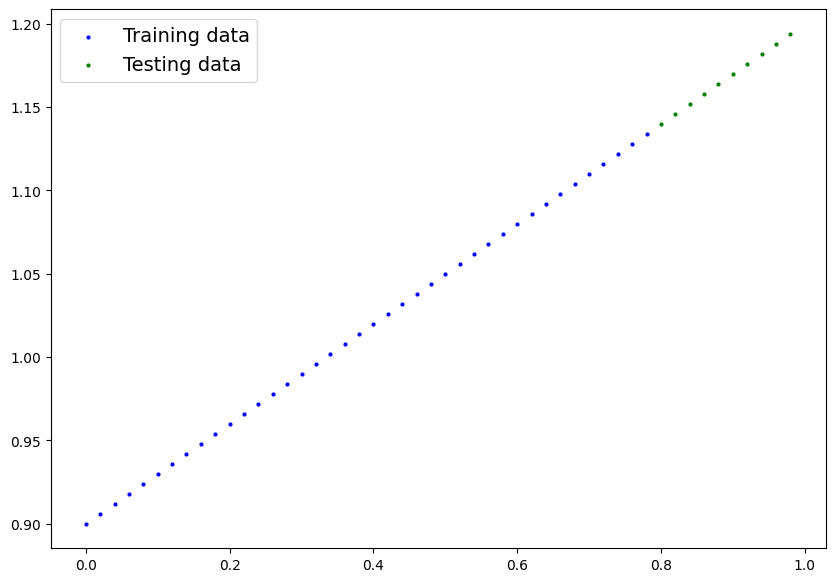

In [7]:
# Plot the training and testing data
plot_predictions(X_train, y_train, X_test, y_test)

In [8]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
# Instantiate the model and put it to the target device
next(model_1.parameters()).device

device(type='cpu')

In [10]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [12]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
   model_1.train()

  # 1. Forward pass
   y_pred = model_1(X_train)

  # 2. Calculate loss
   loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
   optimizer.zero_grad()


  # 4. Backpropagation
   loss.backward()

  # 5. Step the optimizer
   optimizer.step()

  ### Perform testing every 20 epochs
   if epochs % 20 == 0:

    # Put model in evaluation mode and setup inference context

      # 1. Forward pass
      model_1.eval()
      with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)


      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 0.12616769969463348 | Test loss: 0.334
Epoch: 1 | Train loss: 0.12136950343847275 | Test loss: 0.326
Epoch: 2 | Train loss: 0.11709137260913849 | Test loss: 0.317
Epoch: 3 | Train loss: 0.11307823657989502 | Test loss: 0.309
Epoch: 4 | Train loss: 0.10948371887207031 | Test loss: 0.301
Epoch: 5 | Train loss: 0.10633647441864014 | Test loss: 0.294
Epoch: 6 | Train loss: 0.10335826128721237 | Test loss: 0.287
Epoch: 7 | Train loss: 0.1007085070014 | Test loss: 0.280
Epoch: 8 | Train loss: 0.09826184809207916 | Test loss: 0.274
Epoch: 9 | Train loss: 0.09606341272592545 | Test loss: 0.268
Epoch: 10 | Train loss: 0.09406197816133499 | Test loss: 0.262
Epoch: 11 | Train loss: 0.0922679752111435 | Test loss: 0.256
Epoch: 12 | Train loss: 0.09062370657920837 | Test loss: 0.251
Epoch: 13 | Train loss: 0.08918645977973938 | Test loss: 0.246
Epoch: 14 | Train loss: 0.0878094956278801 | Test loss: 0.242
Epoch: 15 | Train loss: 0.08668049424886703 | Test loss: 0.237
Epoch: 1

In [16]:
# Find our model's learned parameters
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.3064]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9045], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [14]:
# Make predictions with the model
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

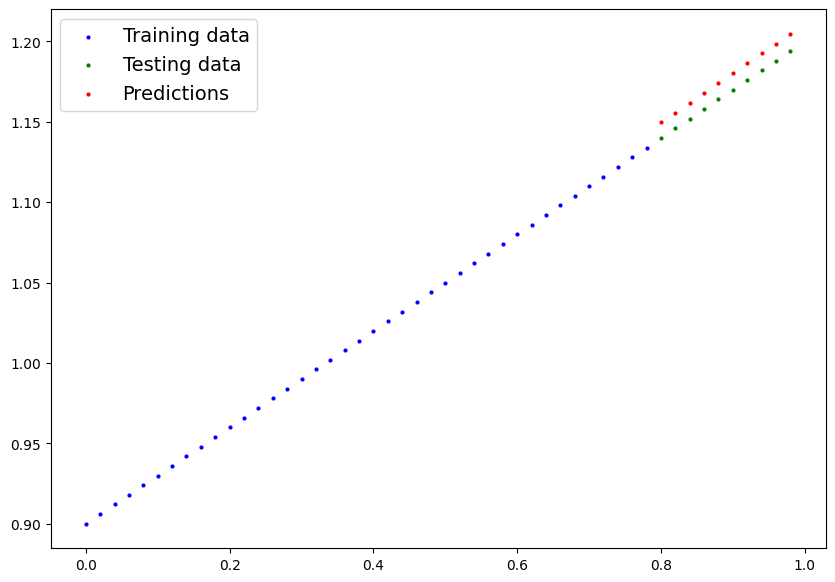

In [15]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [17]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 2. Create model save path
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

# 3. Save the model state dict
print(f"Model saved to: {MODEL_SAVE_PATH}")


Model saved to: models/pytorch_linear_regression_model.pth


In [18]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [21]:
# Make predictions with loaded model and compare them to the previous
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')